# MI 10
### LAMA
### Luisa Myriam Ammar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


### Exercise 1

In [2]:
# Step 1: Load and scale the data
image = plt.imread('testimg.jpg')
data = image.flatten() / 255.0

# Step 2: Create datasets with added Gaussian noise
noise1 = np.random.normal(0, 0.05, size=data.shape)
noise2 = np.random.normal(0, 0.1, size=data.shape)
dataset1 = data + noise1
dataset2 = data + noise2

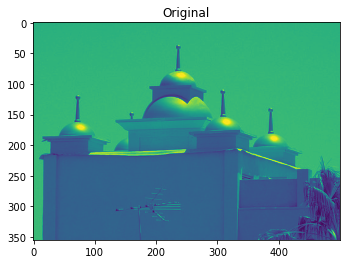

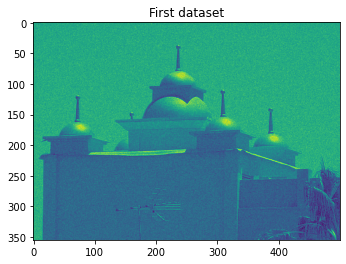

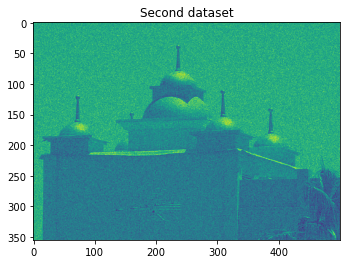

In [3]:
plt.imshow(image)
plt.title('Original')
plt.show()

plt.imshow(dataset1.reshape(image.shape))
plt.title('First dataset')
plt.show()
plt.imshow(dataset2.reshape(image.shape))
plt.title('Second dataset')
plt.show()

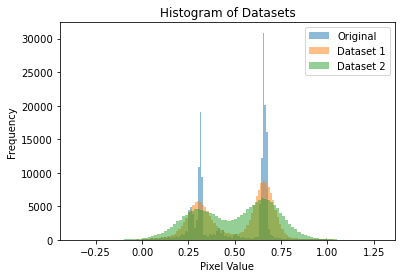

In [4]:
# Step 3: Plot histograms of all datasets
plt.hist(data, bins=100, alpha=0.5, label='Original')
plt.hist(dataset1, bins=100, alpha=0.5, label='Dataset 1')
plt.hist(dataset2, bins=100, alpha=0.5, label='Dataset 2')
plt.legend()
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Datasets')
plt.show()

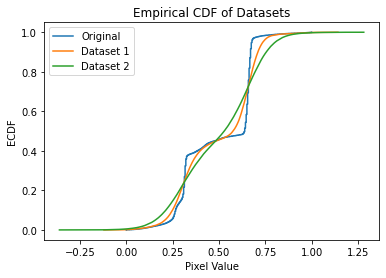

In [5]:
# Step 4: Plot empirical cumulative distribution functions (ECDF)
ecdf_data = np.arange(1, len(data) + 1) / len(data)
ecdf_dataset1 = np.arange(1, len(dataset1) + 1) / len(dataset1)
ecdf_dataset2 = np.arange(1, len(dataset2) + 1) / len(dataset2)

plt.plot(np.sort(data), ecdf_data, label='Original')
plt.plot(np.sort(dataset1), ecdf_dataset1, label='Dataset 1')
plt.plot(np.sort(dataset2), ecdf_dataset2, label='Dataset 2')
plt.legend()
plt.xlabel('Pixel Value')
plt.ylabel('ECDF')
plt.title('Empirical CDF of Datasets')
plt.show()


In [6]:
# Step 5: KDE, Visualization, and Validation
p = 100  # Size of training set
test_set_size = 5000

def kde_rectangular(x, data, h):
    a=np.sum((data >= x - h / 2) & (data < x + h / 2)) / (len(data) * h)
    return a

def kde_gaussian(x, data, h):
    kernel = np.exp(-(x - data)**2 / (2 * h**2)) / (np.sqrt(2 * np.pi) * h)
    return np.mean(kernel)

def negative_log_likelihood(data, test_set, h, kernel):
    log_likelihood = np.log([kernel(x, data, h) for x in test_set])
    return -np.mean(log_likelihood)

def visualize_kde(data,data_2,data_3, kernel, title, h=0.1,p=100):
    fig,ax = plt.subplots(ncols = 3, figsize = (10,5))
    fig.supxlabel('Pixel Value')
    fig.supylabel('Probability Density')
    fig.suptitle(title)
    fig.tight_layout()
    for _ in range(10):
        training_set = np.random.choice(data, size=p, replace=False)
        training_set_2 = np.random.choice(data_2, size=p, replace=False)
        training_set_3 = np.random.choice(data_3, size=p, replace=False)
        ax[0].plot(np.linspace(0, 1, num=1000), [kernel(x, training_set, h) for x in np.linspace(0, 1, num=1000)], alpha=0.5)
        ax[0].set_title('Original data')
        ax[1].plot(np.linspace(0, 1, num=1000), [kernel(x, training_set_2, h) for x in np.linspace(0, 1, num=1000)], alpha=0.5)
        ax[1].set_title('Small noise data')
        ax[2].plot(np.linspace(0, 1, num=1000), [kernel(x, training_set_3, h) for x in np.linspace(0, 1, num=1000)], alpha=0.5)
        ax[2].set_title('Bigger noise data')


    
    plt.show()




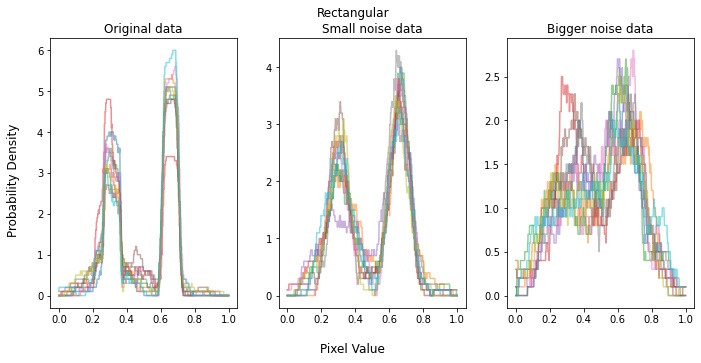

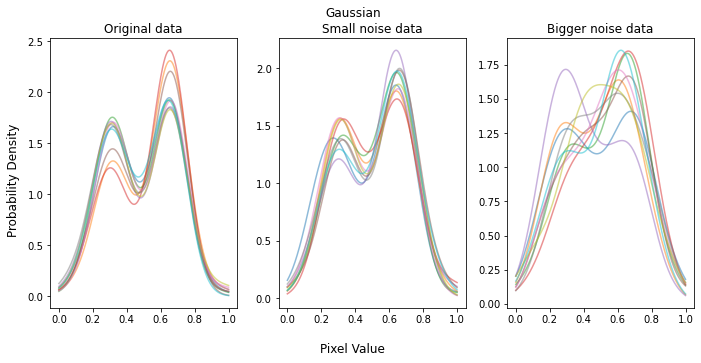

In [7]:
visualize_kde(data,dataset1,dataset2, kde_rectangular, 'Rectangular')
visualize_kde(data,dataset1,dataset2, kde_gaussian, 'Gaussian')



In [8]:
data_shuffled = np.random.permutation(data)
training_set = data_shuffled[:100]
test_set = data_shuffled[101:5101]

data_shuffled_1 = np.random.permutation(dataset1)
training_set_1 = data_shuffled_1[:100]
test_set_1 = data_shuffled_1[101:5101]

data_shuffled_2 = np.random.permutation(dataset2)
training_set_2 = data_shuffled_2[:100]
test_set_2 = data_shuffled_2[101:5101]

def negative_log_likelihood(training_set, test_set, kernel, h):
    log_likelihood = np.log([kernel(x, training_set, h) for x in test_set])
    
    return -np.mean(log_likelihood)

def evaluate_likelihoods(data, test_set, h_values, kernel):
    avg_nll = []
    for h in h_values:
        avg_nll.append(negative_log_likelihood(data, test_set, kernel,h))
    return avg_nll


C:\Users\HAMON\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


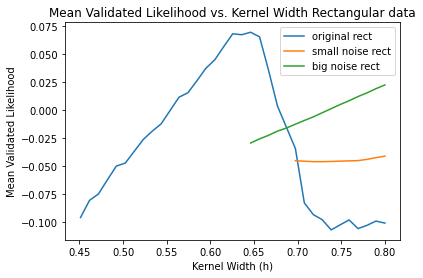

In [9]:
h_values = np.linspace(0.4, 0.8, num=40)
data_rect = evaluate_likelihoods(training_set, test_set, h_values, kde_rectangular)
dataset1_rect = evaluate_likelihoods(training_set_1, test_set_1, h_values, kde_rectangular)
dataset2_rect = evaluate_likelihoods(training_set_2, test_set_2, h_values, kde_rectangular)
plt.plot(h_values, data_rect, label = 'original rect')
plt.plot(h_values, dataset1_rect, label = 'small noise rect')
plt.plot(h_values, dataset2_rect, label = 'big noise rect')
plt.xlabel('Kernel Width (h)')
plt.ylabel('Mean Validated Likelihood')
plt.title('Mean Validated Likelihood vs. Kernel Width Rectangular data')
plt.legend()
plt.show()

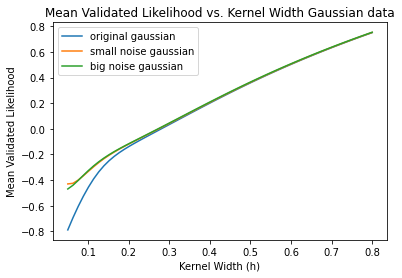

In [10]:
h_values = np.linspace(0.05, 0.8, num=60)
data_gauss = evaluate_likelihoods(training_set, test_set, h_values, kde_gaussian)
dataset1_gauss = evaluate_likelihoods(training_set_1, test_set_1, h_values, kde_gaussian)
dataset2_gauss = evaluate_likelihoods(training_set_2, test_set, h_values, kde_gaussian)
plt.plot(h_values, data_gauss, label = 'original gaussian')
plt.plot(h_values, dataset1_gauss, label = 'small noise gaussian')
plt.plot(h_values, dataset2_gauss, label = 'big noise gaussian')
plt.xlabel('Kernel Width (h)')
plt.ylabel('Mean Validated Likelihood')
plt.title('Mean Validated Likelihood vs. Kernel Width Gaussian data')
plt.legend()
plt.show()

## p = 500

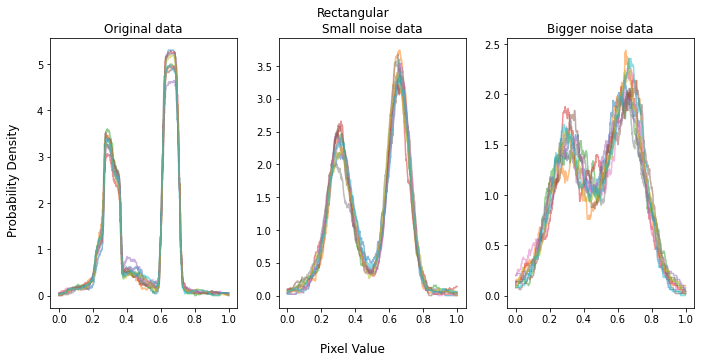

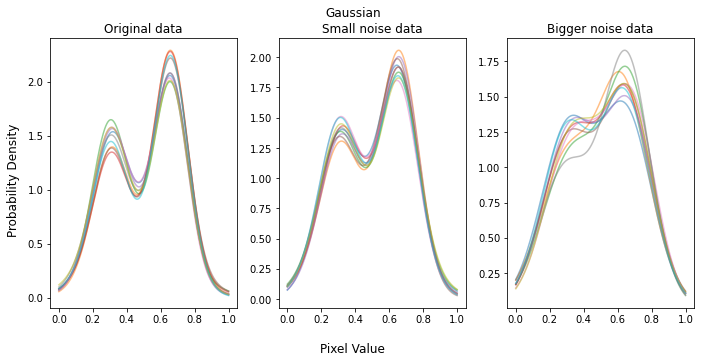

In [11]:
visualize_kde(data,dataset1,dataset2,  kde_rectangular, 'Rectangular',p = 500)
visualize_kde(data,dataset1,dataset2,  kde_gaussian, 'Gaussian', p = 500)


In [12]:
data_shuffled = np.random.permutation(data)
training_set = data_shuffled[:500]
test_set = data_shuffled[501:5601]

data_shuffled_1 = np.random.permutation(dataset1)
training_set_1 = data_shuffled_1[:500]
test_set_1 = data_shuffled_1[501:5601]

data_shuffled_2 = np.random.permutation(dataset2)
training_set_2 = data_shuffled_2[:500]
test_set_2 = data_shuffled_2[501:5601]

C:\Users\HAMON\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


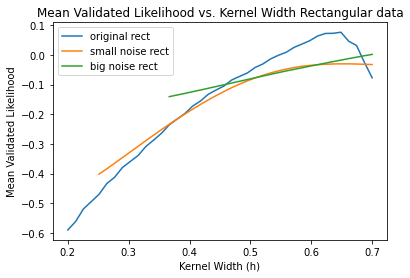

In [13]:
h_values = np.linspace(0.2, 0.7, num=40)
data_rect = evaluate_likelihoods(training_set, test_set, h_values, kde_rectangular)
dataset1_rect = evaluate_likelihoods(training_set_1, test_set_1, h_values, kde_rectangular)
dataset2_rect = evaluate_likelihoods(training_set_2, test_set_2, h_values, kde_rectangular)
plt.plot(h_values, data_rect, label = 'original rect')
plt.plot(h_values, dataset1_rect, label = 'small noise rect')
plt.plot(h_values, dataset2_rect, label = 'big noise rect')
plt.xlabel('Kernel Width (h)')
plt.ylabel('Mean Validated Likelihood')
plt.title('Mean Validated Likelihood vs. Kernel Width Rectangular data')
plt.legend()
plt.show()

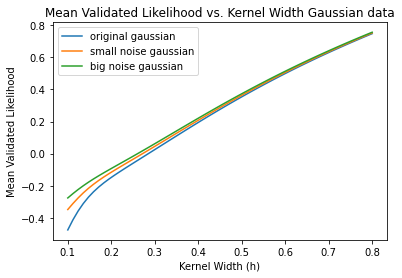

In [14]:
h_values = np.linspace(0.1, 0.8, num=60)
data_gauss = evaluate_likelihoods(training_set, test_set, h_values, kde_gaussian)
dataset1_gauss = evaluate_likelihoods(training_set_1, test_set_1, h_values, kde_gaussian)
dataset2_gauss = evaluate_likelihoods(training_set_2, test_set, h_values, kde_gaussian)
plt.plot(h_values, data_gauss, label = 'original gaussian')
plt.plot(h_values, dataset1_gauss, label = 'small noise gaussian')
plt.plot(h_values, dataset2_gauss, label = 'big noise gaussian')
plt.xlabel('Kernel Width (h)')
plt.ylabel('Mean Validated Likelihood')
plt.title('Mean Validated Likelihood vs. Kernel Width Gaussian data')
plt.legend()
plt.show()